In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #02 - Successive Corrections

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using successive corrections.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Andrew G. Kramer"
__contact__   = "andrew.george.kramer@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles
import pandas as express #Plate w/ double orange chicken and fried rice.

In [3]:
### Read in observations ###
df = express.read_csv(r"C:\Users\andre\Desktop\Class Work\Data Analysis\obs.txt", names = ['Station', 'Lat', 'Lon', 'Height', 'Wind_Dir', 'Wind_Spd']) #Reading in the CSV file into a Pandas dataframe. ALso naming the columns here.
ID = df['Station'] 
lat = df['Lat']*(np.pi/180) #Converting to Radians
lon = df['Lon']*(np.pi/180) #Converting to Radians
height = df['Height'].values
wdir = df['Wind_Dir']
wspd = df ["Wind_Spd"]

In [4]:
### Create function for Cressman Analysis ###
def cressman(dik, R):
        if dik <= R:
            w=((R**2)-(dik**2))/((R**2)+(dik**2))
        elif dik > R:
            w=0
        else:
            print("I Done Fucked Up Somewhere")
    
        return w

In [5]:
### Create function for bilinear interpolation ###

def bilinterp(x,y,RoI):
    rel_x = x - np.floor(x)
    rel_y = y - np.floor(y)
    
    z1 = AA[int(np.floor(y)),int(np.floor(x)), RoI]
    z2 = AA[int(np.ceil(y)), int(np.floor(x)), RoI]
    z3 = AA[int(np.ceil(y)), int(np.ceil(x)), RoI]
    z4 = AA[int(np.floor(y)), int(np.ceil(x)), RoI]
    
    p = ((rel_x-1)*(rel_y-1)*z1-(rel_x-0)*(rel_y-1)*z2+(rel_x-0)*(rel_y-0)*z3-(rel_x-1)*(rel_y-0)*z4)

    return p

In [6]:
### Set up analysis map with a 22x28 rectangular grid of points ###
#From Previous HW
x0 = 18.9 #Setting my constants
y0 = -6.30
del_x = 1.27
x_n = 22 #number of points in the x direction on my grid  (Used Later)
y_n = 28 #number of points in the y direction on my grid (Used Later)
dx = np.arange(18.9,(((del_x*22)+18.9)-1),1.27) #Establishing the x portion of my grid as an array of values
dy = np.arange(-6.30,(((del_x*28)+-6.3)-1),1.27) #Establishing the y portion of my grid as an array of values
xs, ys = np.meshgrid(dx,dy)
###
rho = 6371*1e5 #Setting my constants and converting rho to cm
phi = 90 #degrees
psi_0 = 60 * (np.pi/180)
reflon = -115*(np.pi/180)
map_proj = 1/15e6 #Given the map scale as 1:15,000,000
sigma = (1+np.sin(psi_0))/(1+np.sin(lat)) #Calculating out the appropriate sigma value for each of my values (Dependent on latitude of the obs)
### convert obs lat/long to x,y ###
r = (rho*sigma*np.cos(lat))*map_proj #Calculating out the radius of the earth for each of my points
x = (r*(np.cos(lon-reflon)))
y = (r*(np.sin(lon-reflon))) #Creating coordinate points for my observations
###
gy = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt(((xs/map_proj)**2)+((ys/map_proj)**2))/(rho*(1+np.sin(psi_0))))))
gx = (np.arctan((ys/xs)))*(180/np.pi) + (-115) #Converting my gridpoints into lat/lon values for the map
###
oby = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt(((x/map_proj)**2)+((y/map_proj)**2))/(rho*(1+np.sin(psi_0))))))
obx = (np.arctan(y/x)*(180/np.pi)) + (-115) #Converting my obs points into lat/lon values for the map

In [7]:
dmin = np.zeros(len(x))
for i in range(len(x)):
    rel_x = np.array((x[i]-x))
    rel_y = np.array((y[i]-y))
    dist = ((rel_x**2)+(rel_y**2))**0.5
    dist.sort()
    dmin[i]=dist[1]
        
avgdmin = np.mean(dmin)
print(avgdmin)

2.5548700820071426


In [8]:
#This block is meant to fix my apparently broken code from Assignment01
    
    ### convert obs lat/long to x,y (may want to plot on your analysis grid to verify)### 
#Longitude (from grid to longitude)
map_proj = 1/(15e6)
rho = 6371 * 1e5 #radius of Earth
lambda_o = -115
phi_o = 60*(np.pi/180)   #Converting to radians

#We are converting it from cm to longitude and latitude so that we can plot it 
##############################################################################
#converting the longitude from x-values to longitude  
proj_lon = np.arctan(ys/xs)*(180/np.pi) + lambda_o    #The projection in python has to be in latitude and longitude so these two steps are to go to lat/lon for the projection
#Converting the y-values to latitude values
proj_lat = (180/np.pi)*((np.pi/2)-(2*np.arctan(np.sqrt((xs/map_proj)**2+(ys/map_proj)**2)/(rho*(1+np.sin(phi_o))))))


C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
C:\Users\andre\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


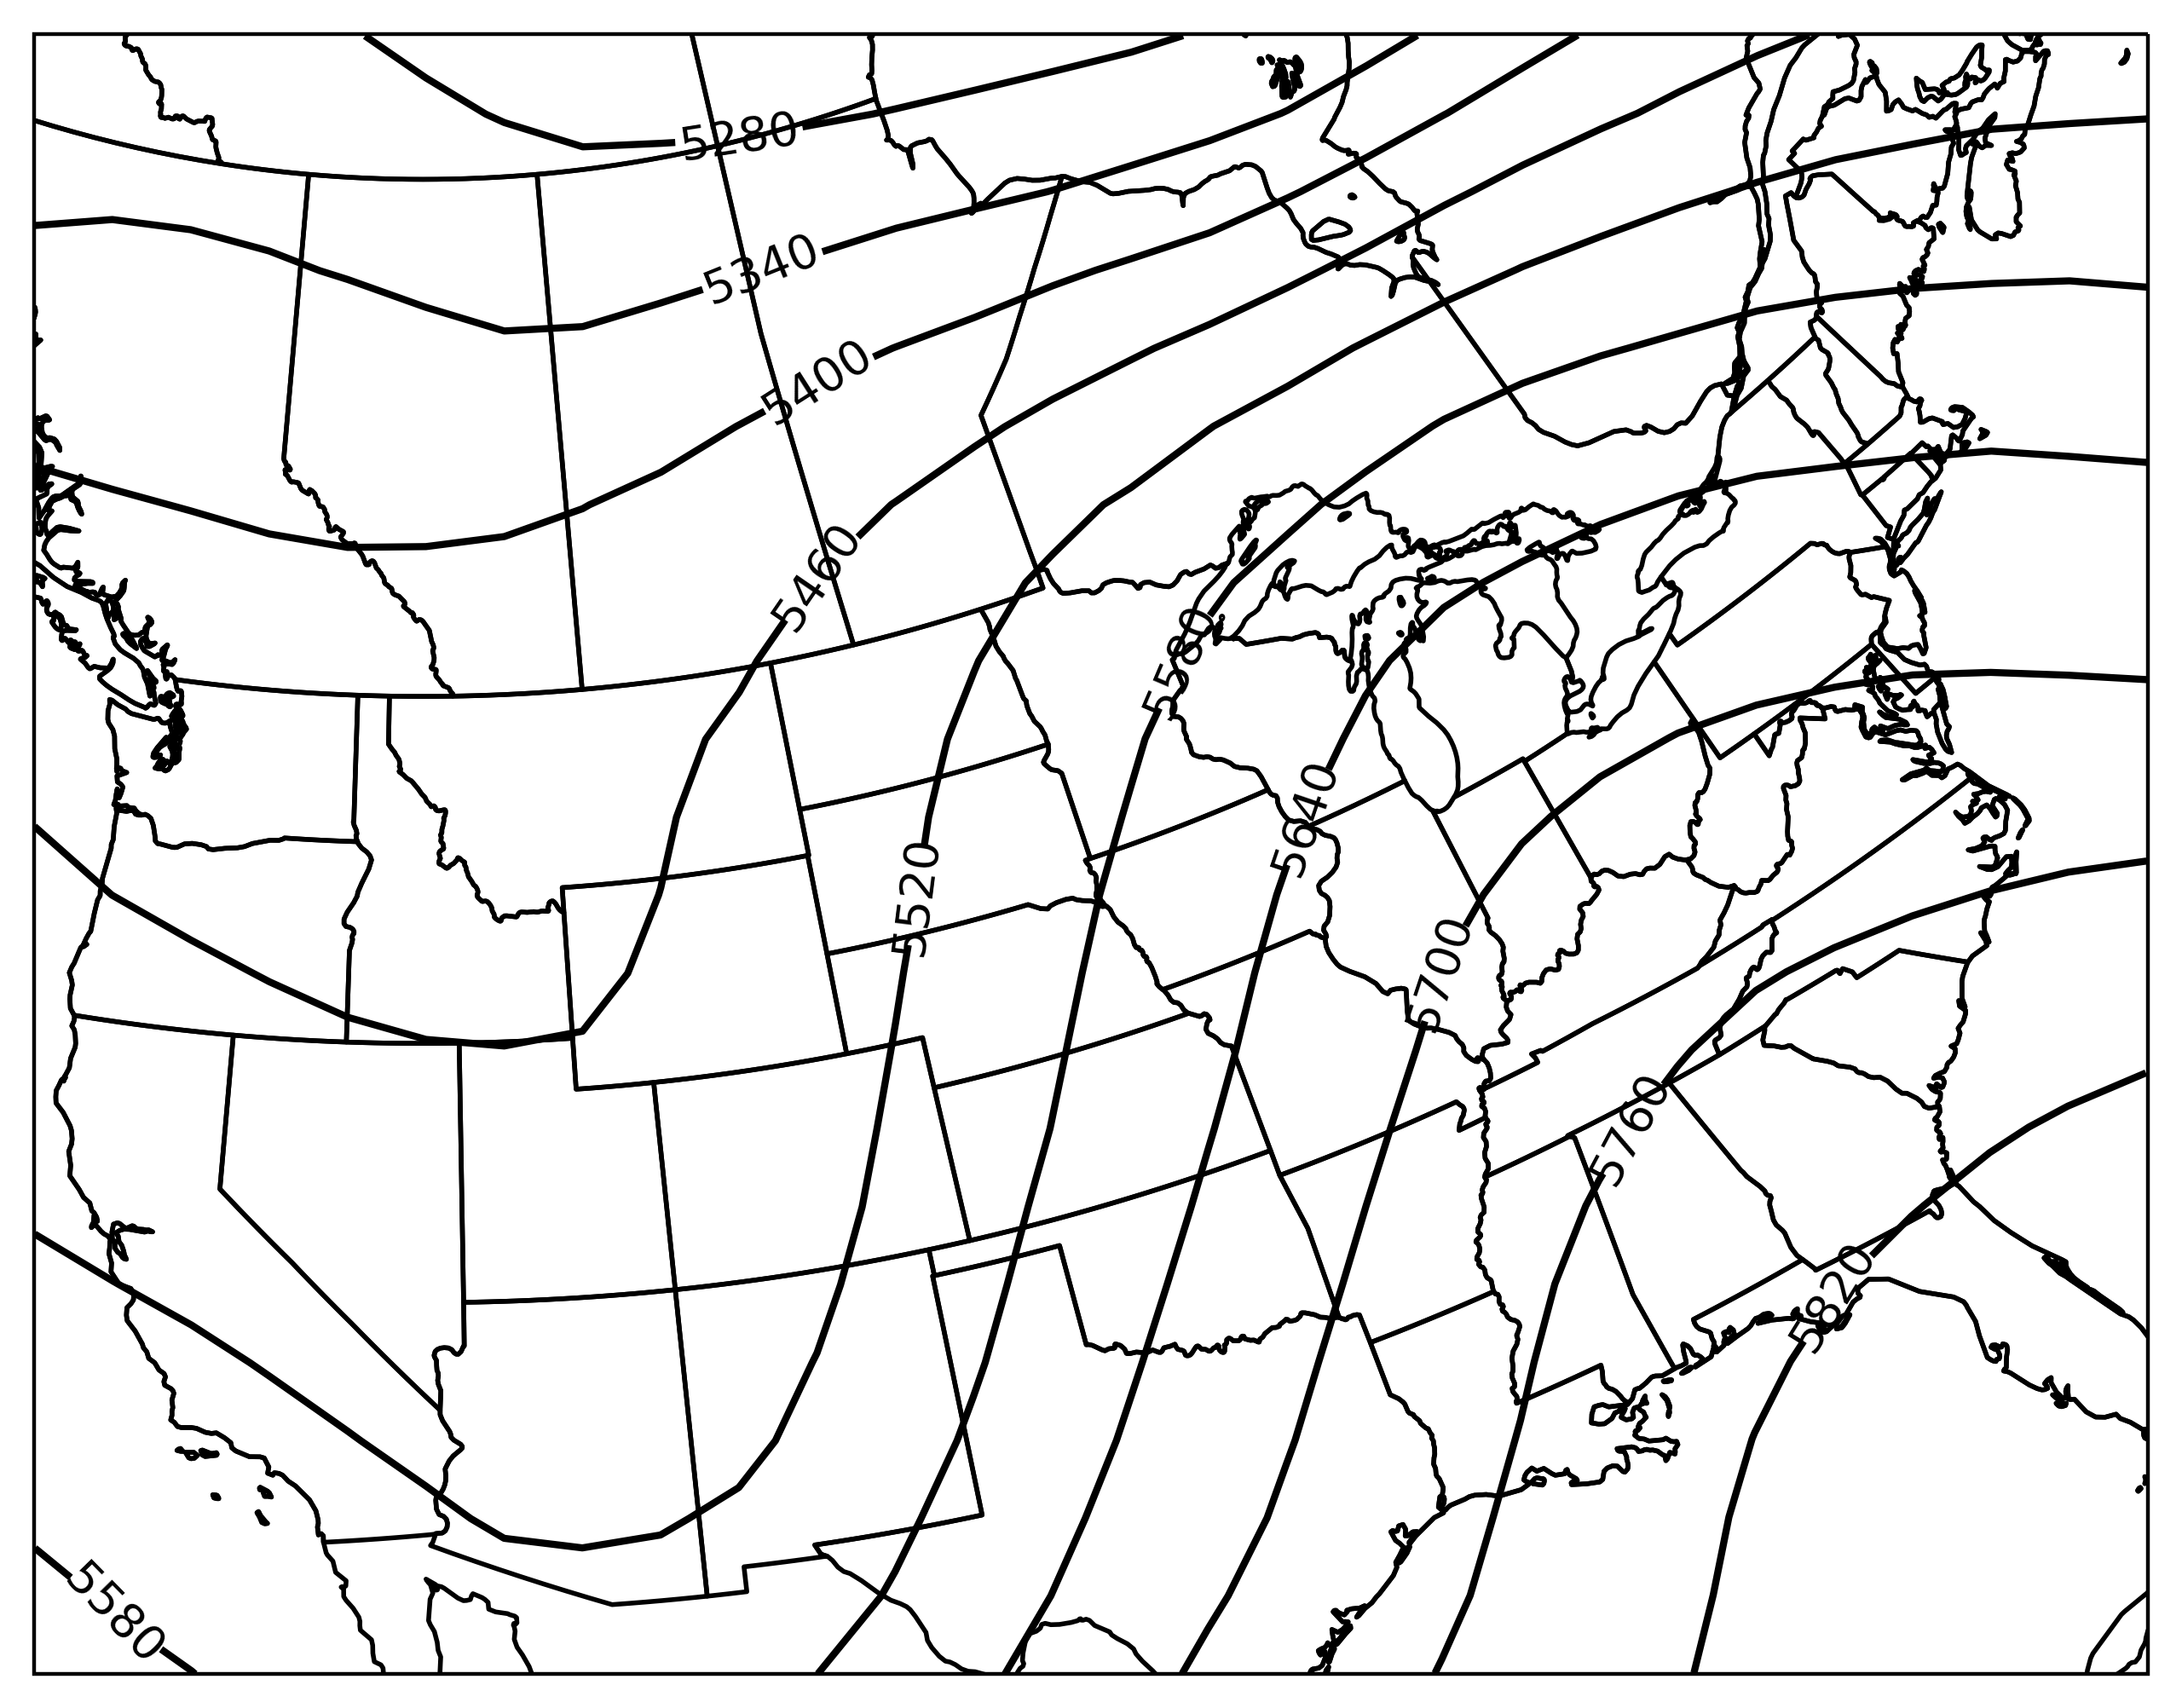

In [9]:
### Perform 500mb geopotential height analyses using a Cressman weighting Function###
#Use radii of influence 4, 2.5, 1.5 *dmin

demon = avgdmin
roi1 = 4*demon
roi2 = 2.5*demon
roi3 = 1.5*demon
rois = np.array([roi1, roi2, roi3])
fo = np.array(height)

#inds_w_in_roi = np.empty(()) #Empty array meant to contain the number of indicies per analysis point found within their radius of influence
AA = np.empty((y_n,x_n,3))

for i in range(len(xs)):
    for j in range(len(xs[0])):
        rel_x2 = np.array(xs[i,j] - x) #The difference of the x values between my analysis point and all observation points
        rel_y2 = np.array(ys[i,j] - y) #Same as above, but with y
        radius = ((rel_x2**2 + rel_y2**2)**0.5) #Distance formula to calculate the distance between the gridpoint and obs
        inds_w_in_roi = np.where(radius<=roi1)[0]
        weights = np.zeros(len(x))
        for k in inds_w_in_roi:
            wik = cressman(radius[k], rois[0])
            weights[k] = wik
            
        AA[i,j,0] = np.sum(weights*fo)/(np.sum(weights))
        

### First analysis, no successive corrections ###

proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax1.add_feature(cfeature.COASTLINE)
cs1 = ax1.contour(proj_lon, proj_lat, AA[:,:,0], colors = 'k', levels = np.arange(0,8000, 60), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs1, levels = np.arange(0,8000,60)) #Labeling appropriately
plt.show() #I wanted to see the map           

In [10]:
### Creating the Observation Relative Index ###
### Setting Up The Second Pass ###
#My Code

ind_x = ((x - x0)/1.27)
ind_y = ((y - y0)/1.27)
J1 = np.zeros((len(x)))

for i in range(len(ind_x)):
    if (ind_x[i] >= 0 and ind_x[i] < 21) and (ind_y[i] >= 0 and ind_y[i] < 27):
        p = bilinterp(ind_x[i], ind_y[i], 0)
    else: #Obs not in grid, do a reverse cressman.
        rel_xa = (x[i] - xs)
        rel_ya = (y[i] - ys)
        radiusa = ((rel_xa**2 + rel_ya**2)**0.5)
        inds_w_in_roi = np.where(radiusa<=rois[0])
        weightsa = np.zeros(xs.shape)
        for m in inds_w_in_roi[0]: 
            for n in inds_w_in_roi[1]:
                wik = cressman(radiusa[m,n], rois[0])
                weightsa[m,n] = wik
        p = np.sum(weightsa*AA[:,:,0])/(np.sum(weightsa))
    J1[i] = p
print(J1)

C:\Users\andre\AppData\Local\Temp\ipykernel_15012\3648104438.py:22: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weightsa*AA[:,:,0])/(np.sum(weightsa))


[5477.84602159 5545.5091093  5379.05803535 5386.02305598 5310.02328544
 5283.77561647           nan 5307.40583748 5330.56999944 5515.66240699
           nan 5497.43991133 5394.80189291 5409.20214547 5249.54545068
 5508.57027816 5297.46135373 5275.5364643  5411.59599703 5315.56549791
 5341.79004778 5293.03275713 5476.82005805 5406.52364713 5514.51266201
 5385.49400699 5513.19356226 5543.54277618 5321.93497682 5697.85794956
 5309.84763936 5512.59209697 5639.80221819 5587.94445798 5320.46603253
 5369.57415552 5640.98922483 5734.2055258  5299.47830463 5507.22100679
 5778.32361205 5745.09624698 5448.12998143 5720.05498228 5300.37645549
 5664.19987556 5731.6559745  5534.08550454           nan 5626.11301309
 5790.51266922 5704.58512764 5578.16325913 5518.36243534 5669.61863357
 5522.73252534 5519.69218061 5668.49483294 5673.1981469  5654.0456922
 5549.26869436 5864.92323171 5314.9338335  5785.75835964 5501.94680691
 5615.30342883 5680.02437766 5455.72734412 5482.04593054 5632.0110197
 5751.70

In [11]:
### Creating the Observation Relative Index ###
### Setting Up The Second Pass ###
#My Code

ind_x = ((x - x0)/1.27)
ind_y = ((y - y0)/1.27)
J1 = np.zeros((len(x)))

for i in range(len(ind_x)):
    if (ind_x[i] >= 0 and ind_x[i] < 21) and (ind_y[i] >= 0 and ind_y[i] < 27):
        p = bilinterp(ind_x[i], ind_y[i], 0)
    else: #Obs not in grid, do a reverse cressman.
        rel_xa = (x[i] - xs)
        rel_ya = (y[i] - ys)
        radiusa = ((rel_xa**2 + rel_ya**2)**0.5)
        inds_w_in_roi = np.where(radiusa<=rois[0])
        weightsa = np.zeros(xs.shape)
        for m in inds_w_in_roi[0]: 
            for n in inds_w_in_roi[1]:
                wik = cressman(radiusa[m,n], rois[0])
                weightsa[m,n] = wik
        p = np.sum(weightsa*AA[:,:,0])/(np.sum(weightsa))
    J1[i] = p
    

### Plotting the Second Pass ###

for i in range(len(xs)):
    for j in range(len(xs[0])):
        rel_x2 = np.array(xs[i,j] - x) #The difference of the x values between my analysis point and all observation points
        rel_y2 = np.array(ys[i,j] - y) #Same as above, but with y
        radius = ((rel_x2**2 + rel_y2**2)**0.5) #Distance formula to calculate the distance between the gridpoint and obs
        inds_w_in_roi = np.where(radius<=rois[1])[0]
        weights = np.zeros(len(x))
        for k in inds_w_in_roi:
            wik = cressman(radius[k], rois[1])
            weights[k] = wik
            
        AA[i,j,1] = AA[i,j,0] + np.nansum(weights*(fo-J1))/(np.nansum(weights))
        
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax2 = fig.add_subplot(111,projection=proj)
ax2.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax2.add_feature(cfeature.COASTLINE)
cs2 = ax2.contour(proj_lon, proj_lat, AA[:,:,1], colors = 'k', levels = np.arange(0,8000, 60), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs2, levels = np.arange(0,8000,60)) #Labeling appropriately
plt.title("Second Pass")
plt.show() #I wanted to see the map

C:\Users\andre\AppData\Local\Temp\ipykernel_15012\1503105944.py:22: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weightsa*AA[:,:,0])/(np.sum(weightsa))


C:\Users\andre\AppData\Local\Temp\ipykernel_15012\4223245274.py:19: RuntimeWarning: invalid value encountered in double_scalars
  p = np.sum(weightsa*AA[:,:,1])/(np.sum(weightsa))
C:\Users\andre\AppData\Local\Temp\ipykernel_15012\4223245274.py:33: RuntimeWarning: invalid value encountered in double_scalars
  AA[i,j,2] = AA[i,j,1] + np.nansum(weights*(fo-J2))/(np.nansum(weights))


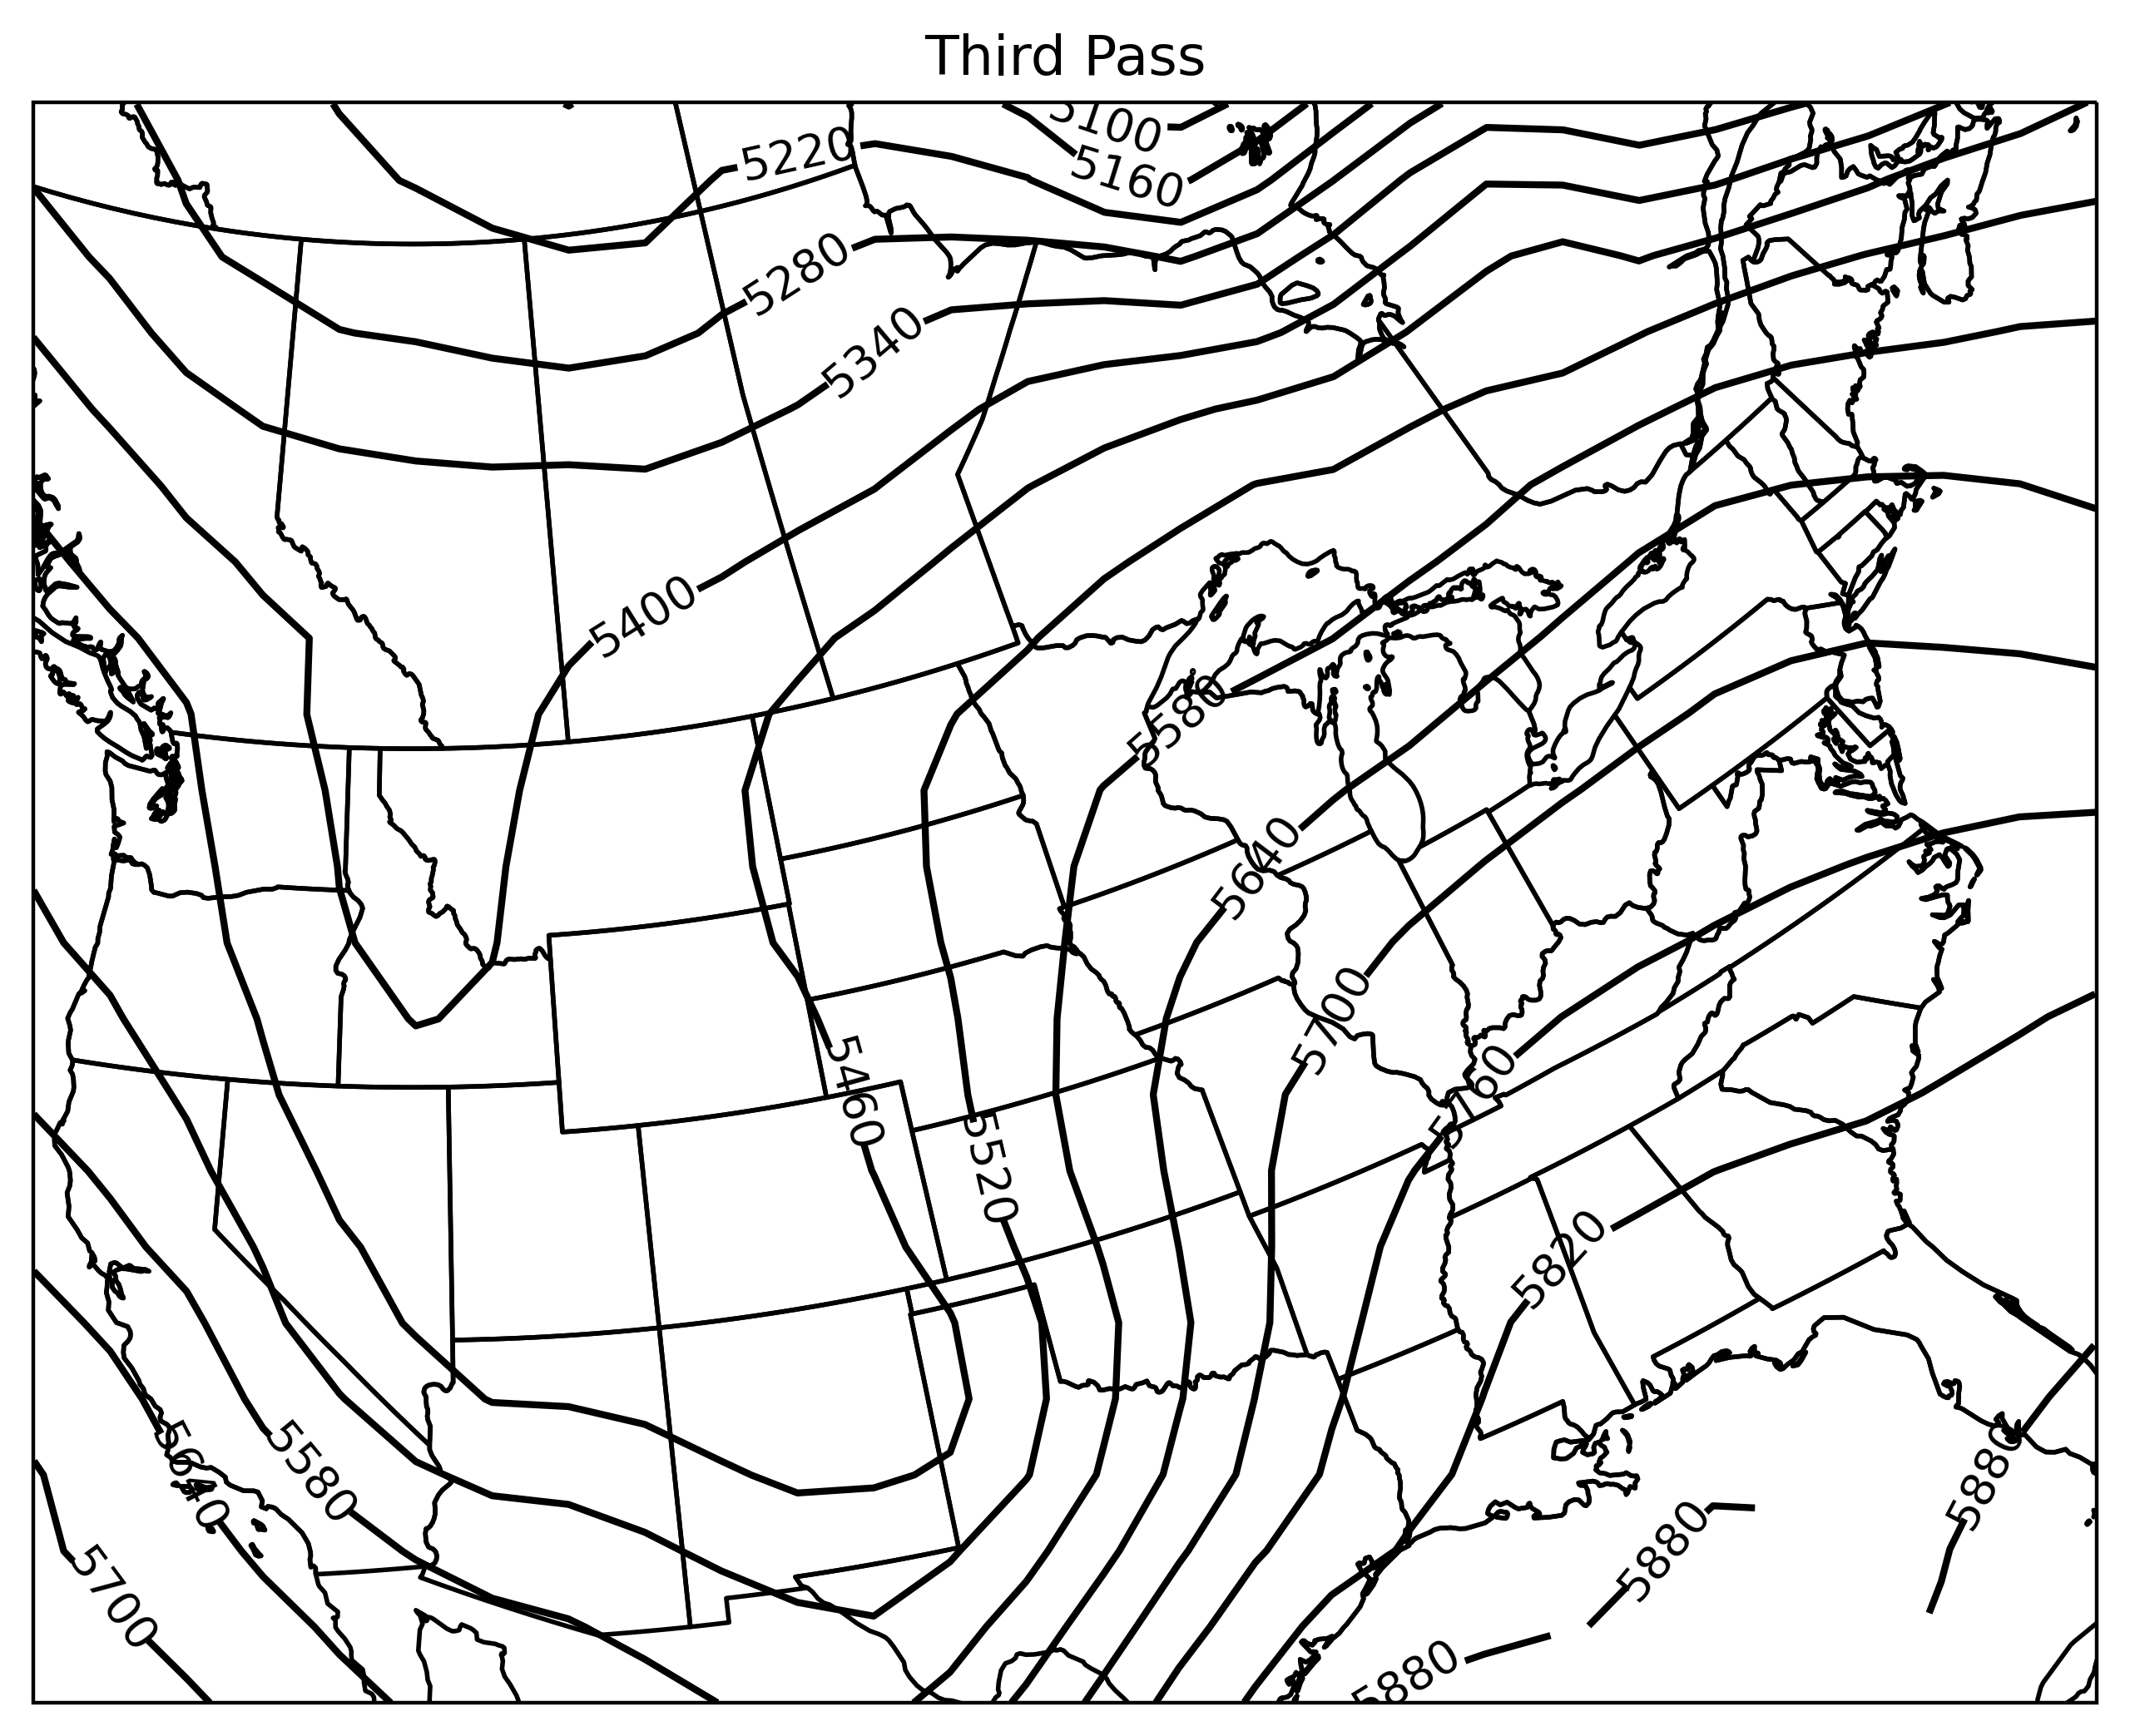

In [12]:
### Third Pass ###
ind_x = (x - x0)/1.27
ind_y = (y - y0)/1.27
J2 = np.empty((len(ind_x)))

for i in range(len(ind_x)):
    if (ind_x[i] >= 0 and ind_x[i] < 21) and (ind_y[i] >= 0 and ind_y[i] < 27):
        p = bilinterp(ind_x[i], ind_y[i], 1)
    else: #Obs not in grid, do a reverse cressman.
        rel_xa = np.array(x[i] - xs)
        rel_ya = np.array(y[i] - ys)
        radiusa = ((rel_xa**2 + rel_ya**2)**0.5)
        inds_w_in_roi = np.where(radiusa<=rois[1])
        weightsa = np.zeros(xs.shape)
        for m in inds_w_in_roi[0]: 
            for n in inds_w_in_roi[1]:
                wik = cressman(radiusa[m,n], rois[1])
                weightsa[m,n] = wik
        p = np.sum(weightsa*AA[:,:,1])/(np.sum(weightsa))
    J2[i] = p
    
for i in range(len(xs)):
    for j in range(len(xs[0])):
        rel_x2 = np.array(xs[i,j] - x) #The difference of the x values between my analysis point and all observation points
        rel_y2 = np.array(ys[i,j] - y) #Same as above, but with y
        radius = ((rel_x2**2 + rel_y2**2)**0.5) #Distance formula to calculate the distance between the gridpoint and obs
        inds_w_in_roi = np.where(radius<=roi3)[0]
        weights = np.zeros(len(x))
        for k in inds_w_in_roi:
            wik = cressman(radius[k], rois[2])
            weights[k] = wik
            
        AA[i,j,2] = AA[i,j,1] + np.nansum(weights*(fo-J2))/(np.nansum(weights))
        
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax2 = fig.add_subplot(111,projection=proj)
ax2.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax2.add_feature(cfeature.COASTLINE)
cs2 = ax2.contour(proj_lon, proj_lat, AA[:,:,2], colors = 'k', levels = np.arange(0,8000, 60), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs2, levels = np.arange(0,8000,60)) #Labeling appropriately
plt.title("Third Pass")
plt.show() #I wanted to see the map

In [13]:
ind_x = (x - x0)/1.27
ind_y = (y - y0)/1.27
J3 = np.empty((len(ind_x)))
for i in range(len(ind_x)):
    if (ind_x[i] >= 0 and ind_x[i] < 21) and (ind_y[i] >= 0 and ind_y[i] < 27):
        p = bilinterp(ind_x[i], ind_y[i], 2)
    else: #Obs not in grid, do a reverse cressman.
        rel_xa = np.array(x[i] - xs)
        rel_ya = np.array(y[i] - ys)
        radiusa = ((rel_xa**2 + rel_ya**2)**0.5)
        inds_w_in_roi = np.where(radiusa<=rois[2])
        weightsa = np.zeros(xs.shape)
        for m in inds_w_in_roi[0]: 
            for n in inds_w_in_roi[1]:
                wik = cressman(radiusa[m,n], rois[2])
                weightsa[m,n] = wik
        p = np.sum(weightsa*AA[:,:,2])/(np.sum(weightsa))
    J3[i] = p

In [14]:
### Calculate Analysis Differences and Plotting Pass 2 - Pass 1 ###
AA21 = AA[:,:,1]-AA[:,:,0]
AA31 = AA[:,:,2]-AA[:,:,0]
AA32 = AA[:,:,2]-AA[:,:,1]

proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax2 = fig.add_subplot(111,projection=proj)
ax2.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax2.add_feature(cfeature.COASTLINE)
cs2 = ax2.contour(proj_lon, proj_lat, AA21, colors = 'forestgreen', levels = np.arange(-8000,8000, 25), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs2, levels = np.arange(-8000,8000,25)) #Labeling appropriately
plt.title("Pass 2 - Pass 1")
plt.show() #I wanted to see the map

In [15]:
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax2 = fig.add_subplot(111,projection=proj)
ax2.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax2.add_feature(cfeature.COASTLINE)
cs2 = ax2.contour(proj_lon, proj_lat, AA32, colors = 'forestgreen', levels = np.arange(-8000,8000, 25), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs2, levels = np.arange(-8000,8000,25))#Labeling appropriately
plt.title("Pass 3 - Pass 2")
plt.show() #I wanted to see the map

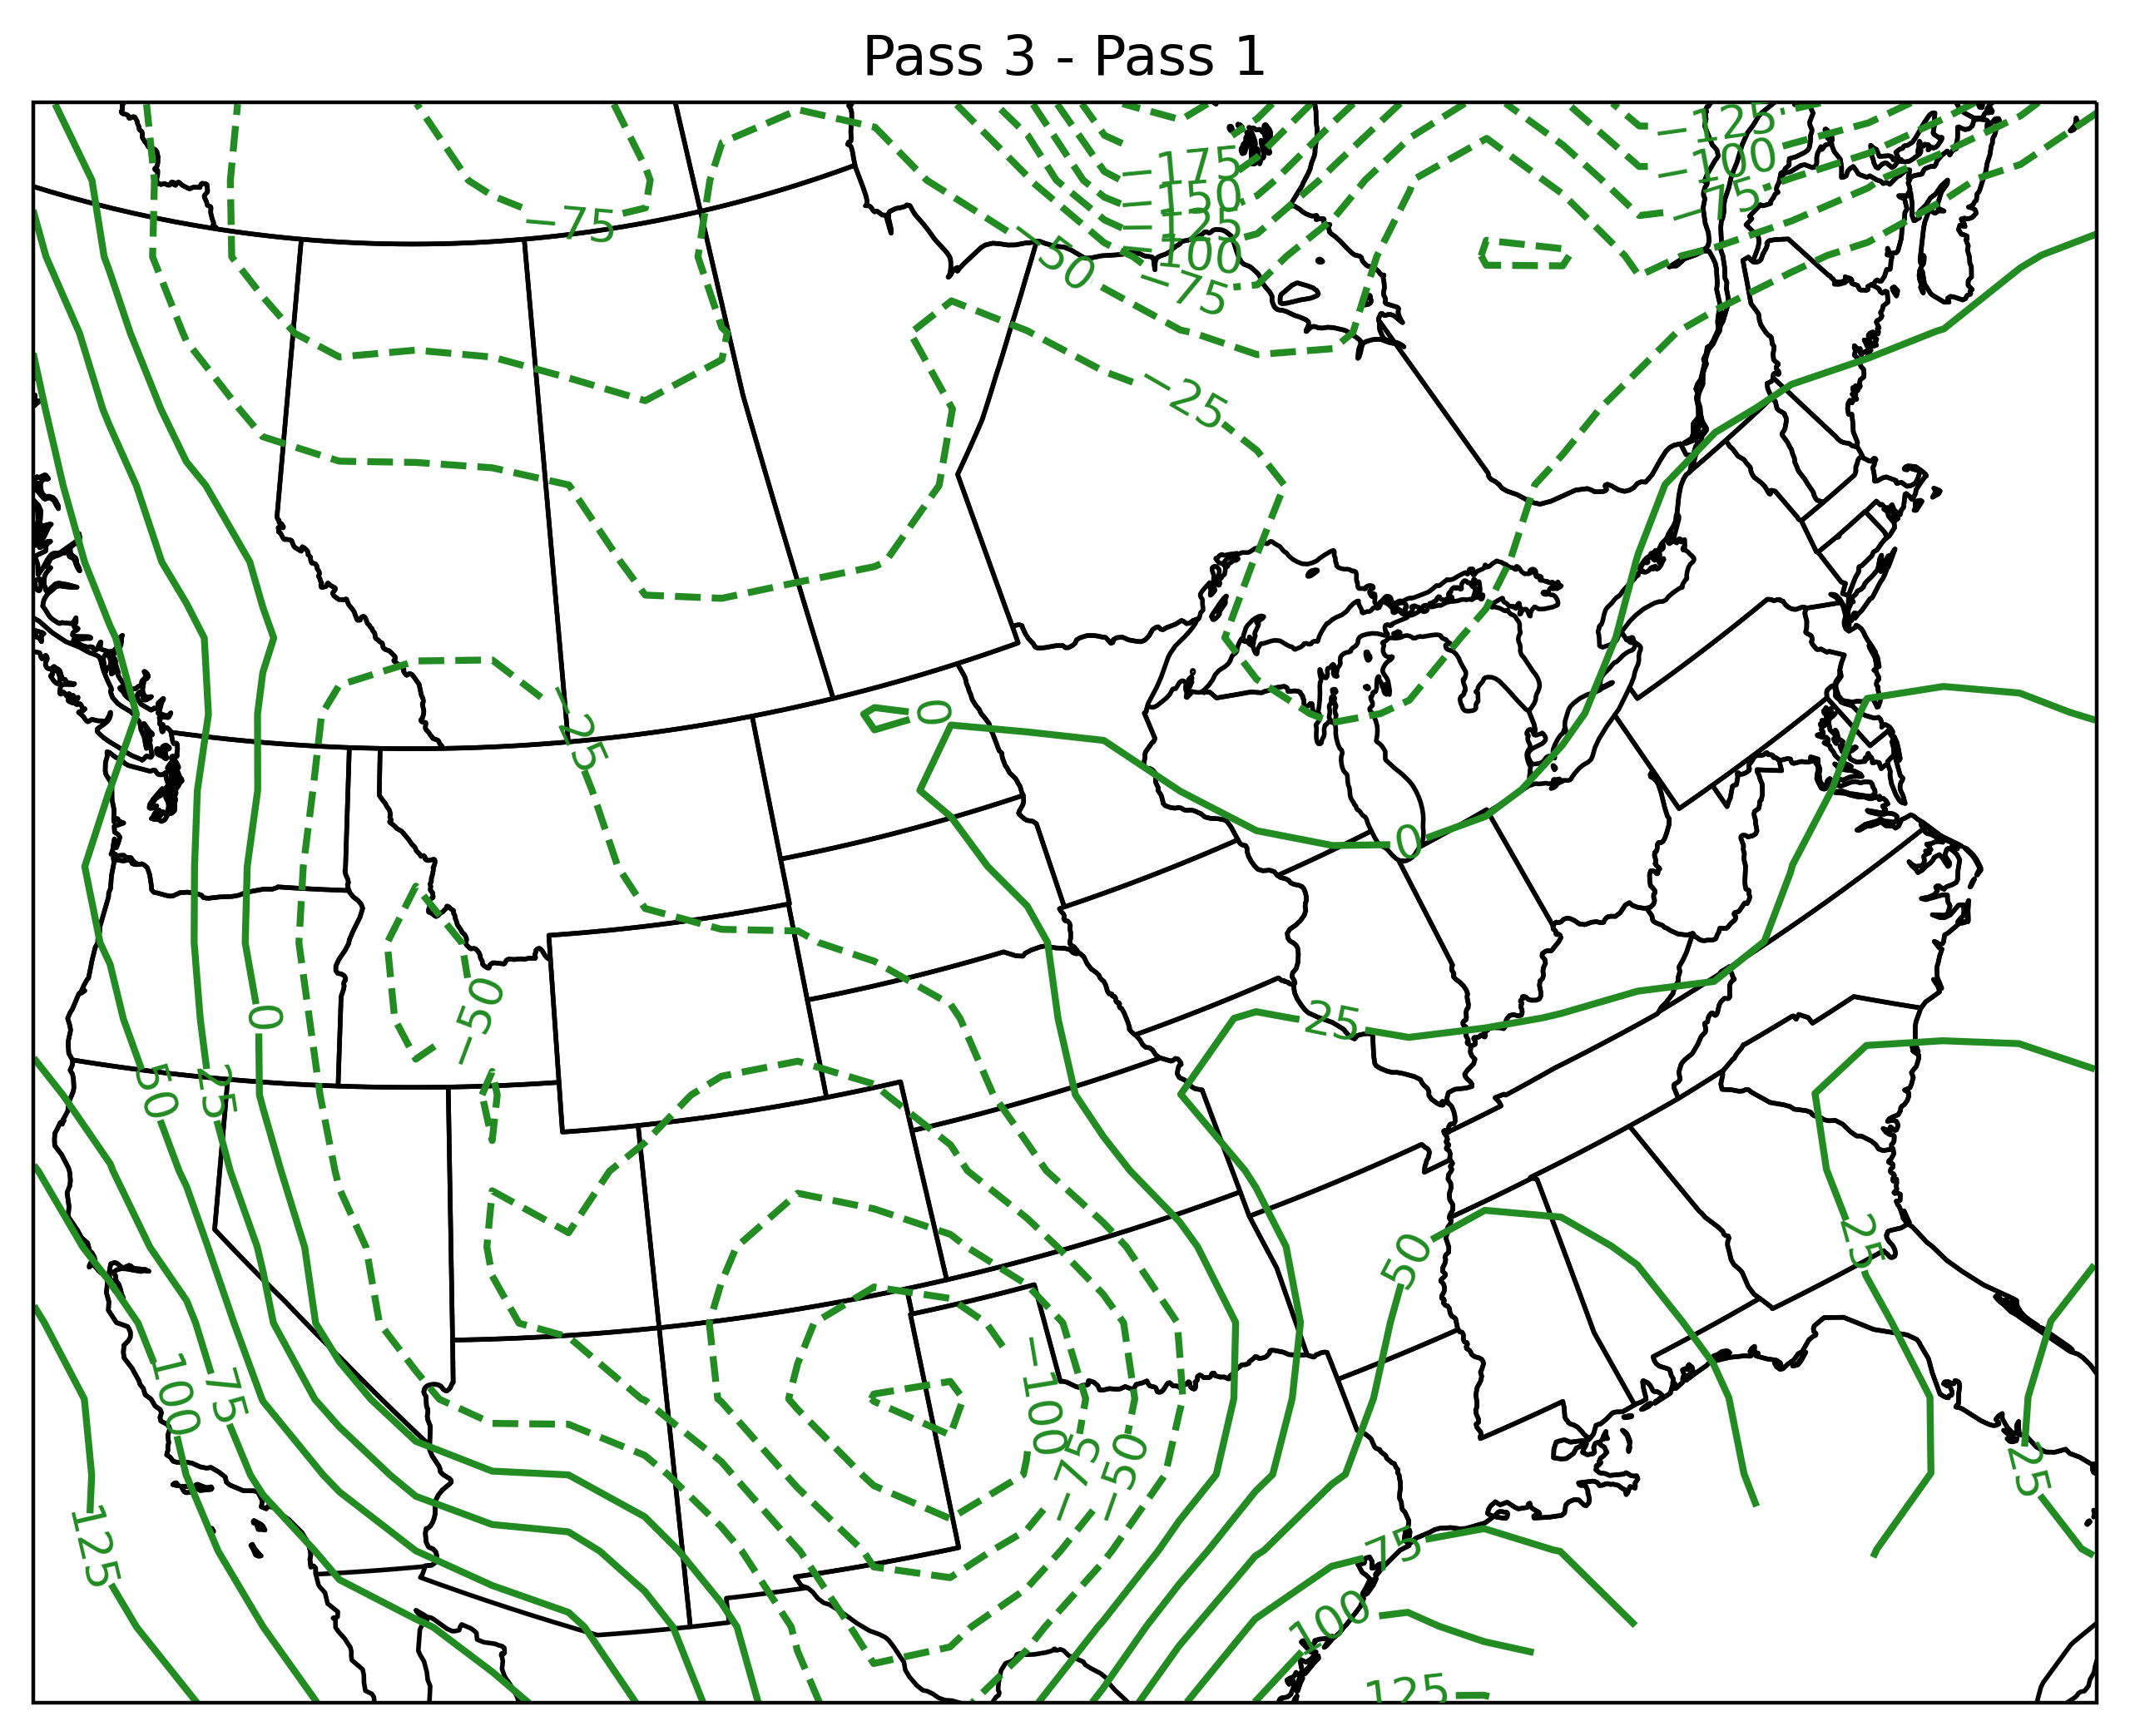

In [16]:
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90, true_scale_latitude = 60) #Creating the polar-stereographic backround
fig = plt.figure(figsize=(8,8),dpi=400)
ax2 = fig.add_subplot(111,projection=proj)
ax2.add_feature(cfeature.STATES) #Providing state boarders and coastlines to provide visual reference points
ax2.add_feature(cfeature.COASTLINE)
cs2 = ax2.contour(proj_lon, proj_lat, AA31, colors = 'forestgreen', levels = np.arange(-8000,8000, 25), transform = ccrs.PlateCarree()) #Creating a contour plot of the values of my analysis array (My c_00 values) at each analysis point.
plt.clabel(cs2, levels = np.arange(-8000,8000,25)) #Labeling appropriately
plt.title("Pass 3 - Pass 1")
plt.show() #I wanted to see the map

In [17]:
### Calculating RMS ###
d1 = (fo-J1)**2
d1 = d1[~np.isnan(d1)]
o1 = np.sqrt(np.sum(d1)/len(d1))

d2 = (fo-J2)**2
d2 = d2[~np.isnan(d2)]
o2 = np.sqrt(np.sum(d2)/len(d2))

d3 = (fo-J3)**2
d3 = d3[~np.isnan(d3)]
o3 = np.sqrt(np.sum(d3)/len(d3))

ThisOne = np.array((o1,o2,o3))

In [18]:
### Store the analyses in text files ###
np.savetxt('FirstPassAnalysis.txt', AA[:,:,0], delimiter=',') 
np.savetxt('SecondPassAnalysis.txt', AA[:,:,1], delimiter=',')
np.savetxt('ThirdPassAnalysis.txt', AA[:,:,2], delimiter=',')
### Store the difference fields in text files ###
np.savetxt('2P-1P.txt', AA21, delimiter=',') 
np.savetxt('3P-2P.txt', AA32, delimiter=',')
np.savetxt('3P-1P.txt', AA31, delimiter=',')
### Store RMS values in text file ###
np.savetxt('RMS_Values', ThisOne, delimiter=',') 

In [19]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    
    Of the contoured "First Pass"/"Second Pass"/"Third Pass" analyses, there is a trough axis over the Rockies and a ridge axis
    over the eastern portions of the U.S. stretching from Georgia to Ohio.
    
    
2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    
    The first pass seems to be the smooth-est. With each successive pass as the radius of influence is decreased, the 500mb height
    contours seem to become more jagged. 

3 - What happens as you increase the number of successive correction passes?  Is this 
    desirable?  Why or why not?
    
    We appear to be moving further and further away from what the original observations were telling us 
    but this is desireable to an extent. Successive corrections is supposed to be able to "fill in gaps" and smooth out errors
    associated with the original observations. Though as we discussed in class, more passes does not always mean a better analysis.
    It was mentioned that 2/3 passes is a good rule of thumb for successive corrections, which is what was done in this lab.
'''

'\n1 - Describe the general features that you see in your contoured analyses.\n    \n    Of the contoured "First Pass"/"Second Pass"/"Third Pass" analyses, there is a trough axis over the Rockies and a ridge axis\n    over the eastern portions of the U.S. stretching from Georgia to Ohio.\n    \n    \n2 - Describe the differences that you see in your contoured analyses.  \n    Does one analysis seem to be smoother than the other?  If so, what would cause this?\n    \n    The first pass seems to be the smooth-est. With each successive pass as the radius of influence is decreased, the 500mb height\n    contours seem to become more jagged. \n\n3 - What happens as you increase the number of successive correction passes?  Is this \n    desirable?  Why or why not?\n    \n    We appear to be moving further and further away from what the original observations were telling us \n    but this is desireable to an extent. Successive corrections is supposed to be able to "fill in gaps" and smooth out